# Stats and Public Health Part 2

In [1]:
# library for arrays of data
import numpy as np
# library for data manipulation and analysis
import pandas as pd 
# library for plotting data 
import matplotlib.pyplot as plt 
# another library for plotting data
import seaborn as sns
# package to fit and explore linear regression models
import statsmodels.api as sm
# library for statistical analysis
from scipy import stats

In [2]:
# load mosquito_data_part_2.csv
df = pd. read_csv('mosquito_data_part_2.csv')
df.head(5)

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


In [3]:
# Convert the WNV Present column into a binary column and create dummy variables from the Trap type column

# set positive to 1 and negative to 0
wnx_present = {'positive': 1,'negative': 0}

# convert WNV Present column into a binary column
df["WNV Present"] = [wnx_present[item] for item in df["WNV Present"]]

# CHECKPOINT DISPLAYING CHANGE IN "WNV Present" 
print(f'Unique values in WNV Present: {df["WNV Present"].unique()}')
df.head(5)

Unique values in WNV Present: [0 1]


,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9


In [4]:
# QUESTION 1 (cont.)

# update dataframe to include dummy variables from the Trap type column
trap_type_dummies = pd.get_dummies(df['Trap type']).rename(columns=lambda trap: 'Trap_type_' + str(trap))
df = pd.concat([df, trap_type_dummies], axis=1)

# drop original Trap type column in dataframe
df.drop(['Trap type'], inplace=True, axis=1)

# CHECKPOINT DISPLAYING ADDED DUMMY VARIABLES TO "Trap type" AND REMOVAL OF ORIGINAL "Trap type" IN DATAFRAME
df.head(5)

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,Trap_type_CDC,Trap_type_GRAVID,Trap_type_OVI,Trap_type_SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0


## Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

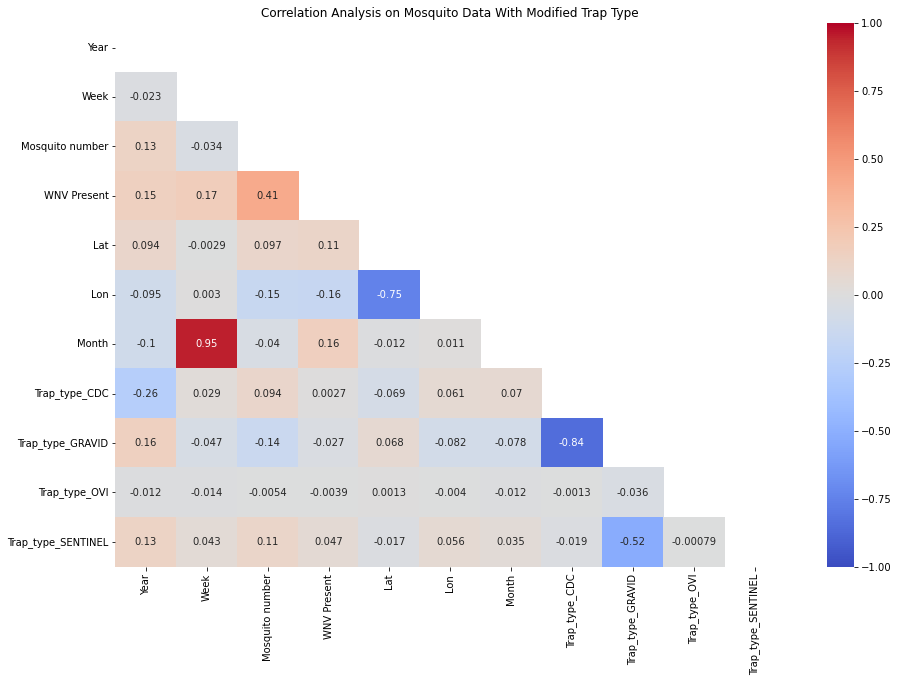

In [8]:
# create a heat map for full correlation analysis on mosquito data
plt.figure(figsize=(15,10))
plt.title("Correlation Analysis on Mosquito Data With Modified Trap Type")
sns.heatmap(df.corr(),cmap='coolwarm',vmin=-1.0,vmax=1.0,center=0,annot=True, mask=np.triu(df.corr()))
plt.show()

#### Correlation with Mosquitoes Caught Findings

<font color = "indigo">
    Columns with positive correlations to mosquitos caught: Year, WNV Present, Lat, Trap_type_CDC, Trap_type_SENTINEL 

- **largest positive** correlation coefficients to mosquitos caught is **WNV Present** with 0.41  
    
Columns with negative correlations to mosquitos caught: Week, Lon, Month, Trap_type_OVI, Trap_type_GRAVID 
- **largest negative** correlation coefficients to mosquitos caught is **Lon** with -0.15

In [9]:
# get the columns in mosquito data that can perform a correlation analysis on mosquito number 
column_list = ["Year","Week", "WNV Present","Lat","Lon","Month", "Trap_type_GRAVID", "Trap_type_CDC", "Trap_type_OVI", "Trap_type_SENTINEL"]

# Null Hypothesis: Mosquitos mosquitos has no significant correlation to the column in column_list.
# Alternative Hypothesis: Mosquitos mosquitos has a significant correlation to the column in column_list.

# calculate the correlation coefficient and p-value to determine statistic significance between Mosquito number and column_list  
for column in column_list:
    corr_coeff,p_val = stats.pearsonr(df["Mosquito number"],df[column])
    print(f"Mosquito number and {column}: corr = {round(corr_coeff,3)} , p-value = {round(p_val,3)}")

Mosquito number and Year: corr = 0.129 , p-value = 0.0
Mosquito number and Week: corr = -0.034 , p-value = 0.0
Mosquito number and WNV Present: corr = 0.408 , p-value = 0.0
Mosquito number and Lat: corr = 0.097 , p-value = 0.0
Mosquito number and Lon: corr = -0.151 , p-value = 0.0
Mosquito number and Month: corr = -0.04 , p-value = 0.0
Mosquito number and Trap_type_GRAVID: corr = -0.138 , p-value = 0.0
Mosquito number and Trap_type_CDC: corr = 0.094 , p-value = 0.0
Mosquito number and Trap_type_OVI: corr = -0.005 , p-value = 0.463
Mosquito number and Trap_type_SENTINEL: corr = 0.109 , p-value = 0.0


#### Correlation with Mosquitoes Caught Findings (cont. )
<font color = "indigo">
From calculating the p-values of all columns in column_list shown above against Moquito numbers, we can reject all null hypothesis except Trap_type_OVI. 
<br>

**There is a significant positive correlation between Moquito numbers and the following columns: Year, WNV Present, Lat, Trap_type_CDC, Trap_type_SENTINEL. There is a significant negative correlation between Moquito numbers and the following columns: Week, Lon, Month, Trap_type_GRAVID.The pearsonr is inconclusive to determine the significant negative correlation between Moquito numbers and Trap_type_OVI.** 

</font>